# Lecture 5: Python Libraries for Audio Processing and Music Creation

## Installations

Start by running this line to download all the required packages.

In [ ]:
%pip install numpy matplotlib scipy librosa sounddevice music21 simpleaudio pygame pedalboard

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.io import wavfile
import librosa
import sounddevice as sd
import music21
import pygame.mixer
import simpleaudio as sa
from IPython.display import Audio
import soundfile as sf
import pedalboard

# Display settings for the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# 1. Basic Audio Loading and Playing

## 1.1 SciPy - Basic Audio I/O
scipy.io.wavfile is the most basic way to read/write WAV files

In [3]:
def load_wav_example(filename="example.wav"):
    sample_rate, audio_data = wavfile.read(filename)
    print(f"Sample rate: {sample_rate} Hz")
    print(f"Audio duration: {len(audio_data)/sample_rate:.2f} seconds")
    print(f"Data shape: {audio_data.shape}")
    return sample_rate, audio_data

In [4]:
sr, audio = load_wav_example("exported_sound.wav")

Sample rate: 11025 Hz
Audio duration: 2.62 seconds
Data shape: (28884,)


In [5]:
# Play the audio
Audio(audio, rate=sr)

## 1.2 Librosa - Advanced Audio I/O

Librosa is the most popular audio package for Python!

In [6]:
def load_audio_example(filename="example.wav"):
    y, sr = librosa.load(filename)
    print(f"Sample rate: {sr} Hz")
    print(f"Audio duration: {len(y)/sr:.2f} seconds")
    print(f"Data shape: {y.shape}")
    return y, sr

In [7]:
y, sr = load_audio_example("exported_sound.wav")

Sample rate: 22050 Hz
Audio duration: 2.62 seconds
Data shape: (57768,)


In [8]:
def librosa_example(filename="example.wav"):
    y, sr = librosa.load(filename)
    
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform')
    plt.show()
    
    # Compute and display mel-spectrogram
    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_spect_db = librosa.power_to_db(mel_spect, ref=np.max)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(mel_spect_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-Spectrogram')
    plt.show()


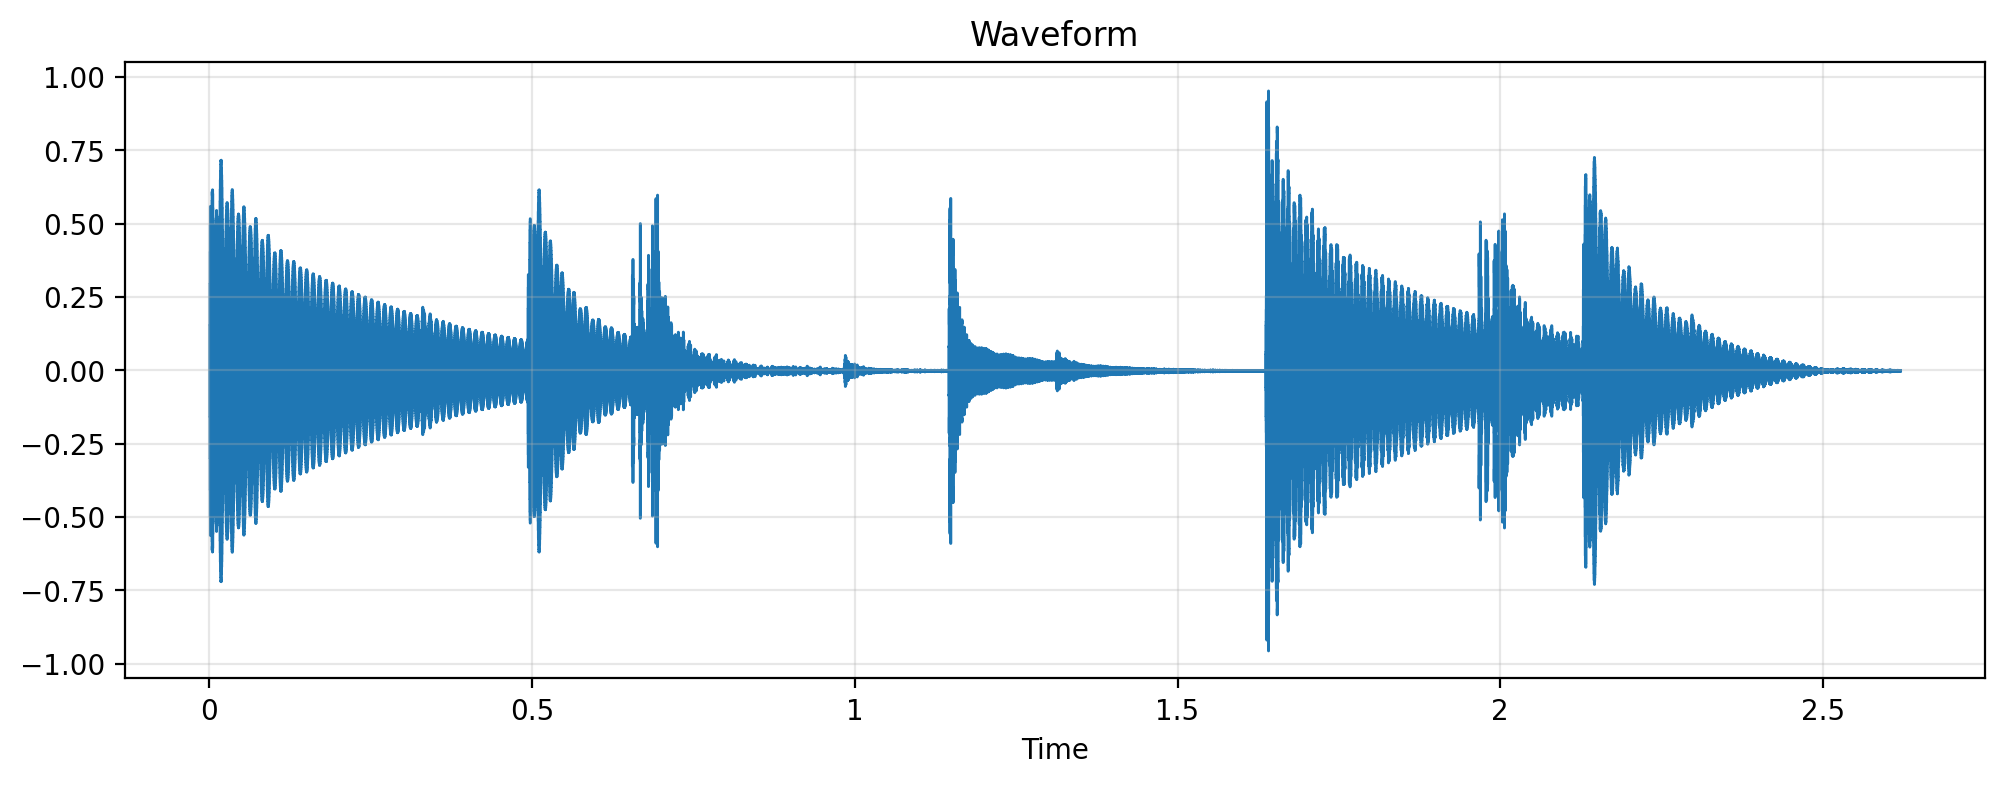

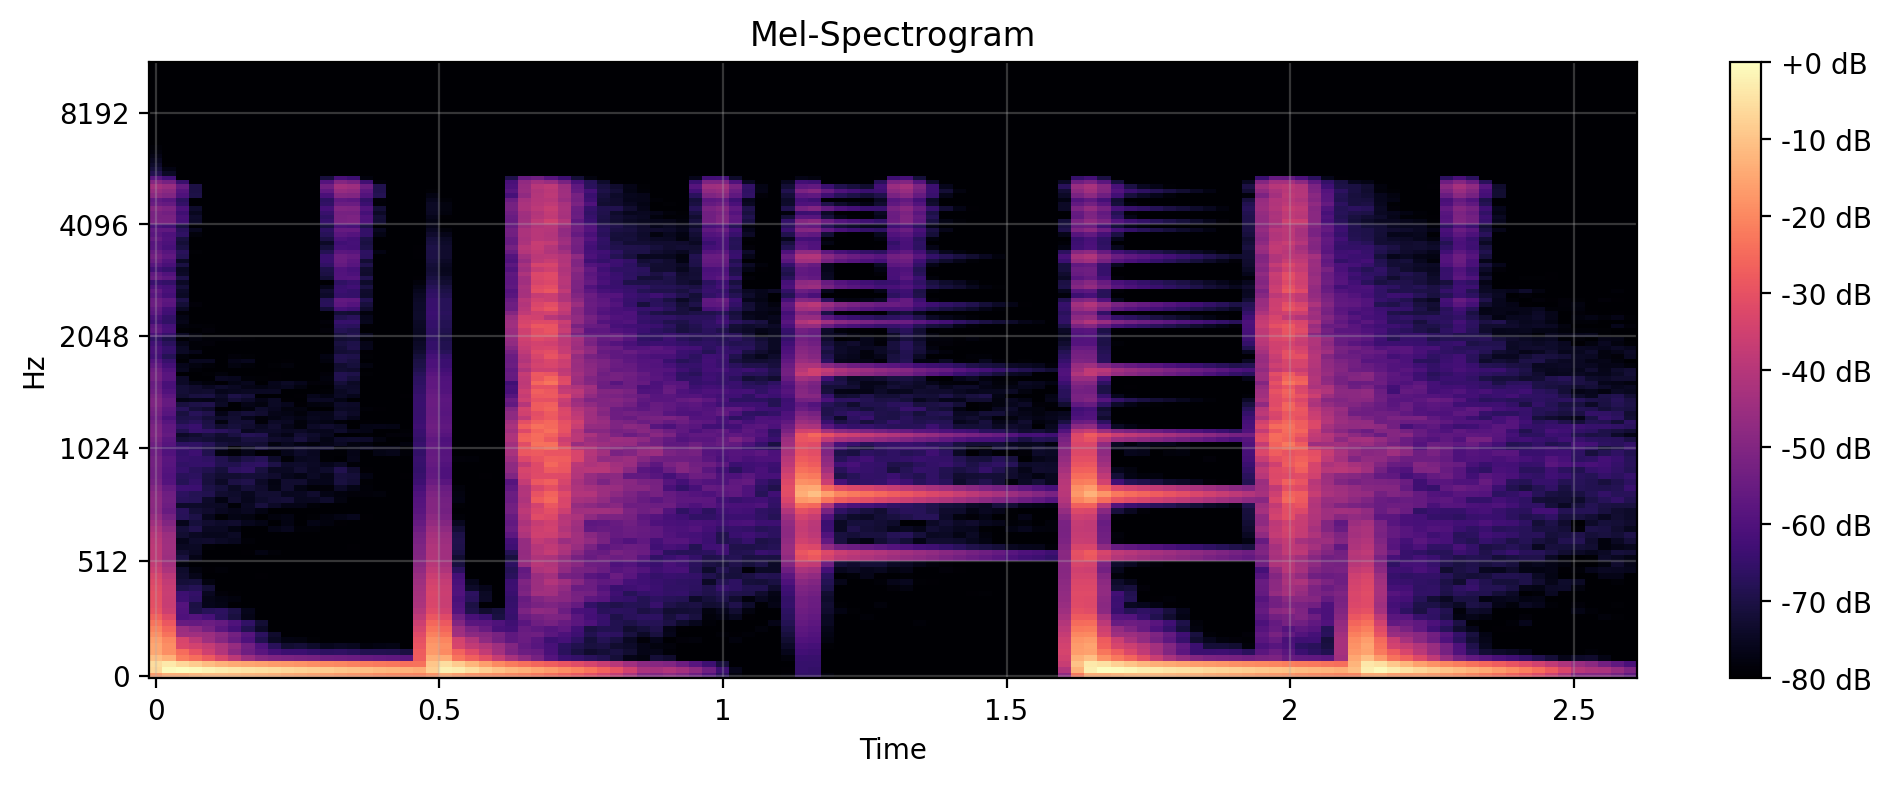

In [9]:
librosa_example("exported_sound.wav")

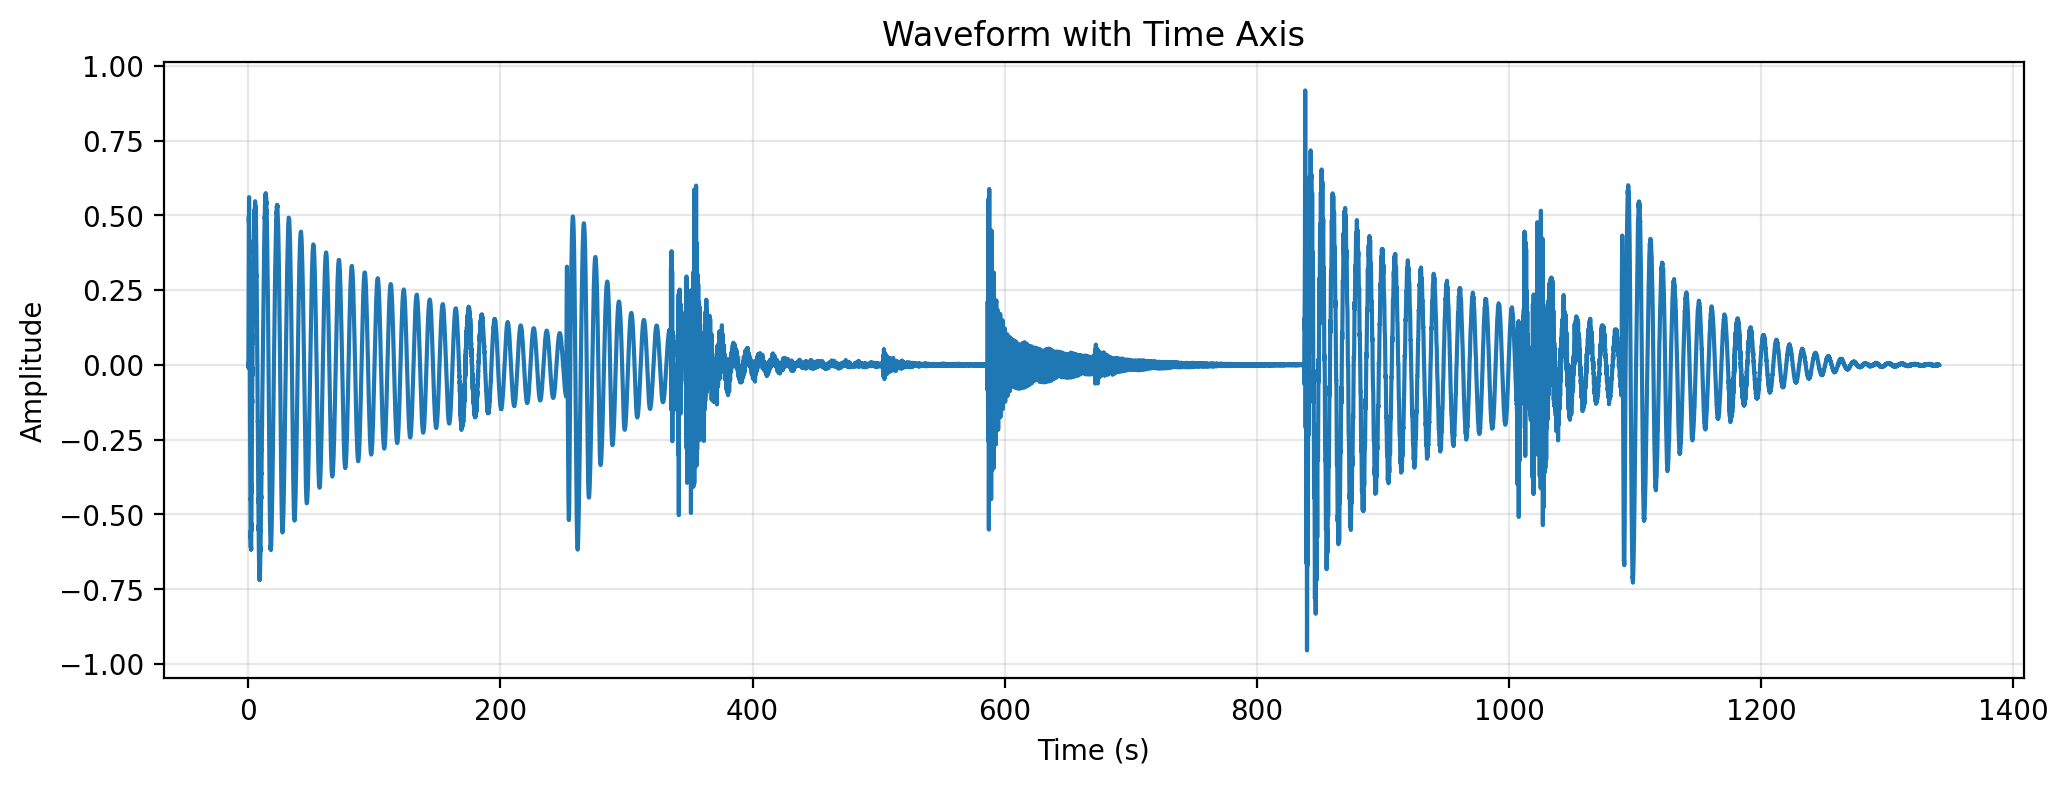

Duration: 2.62 seconds
Estimated tempo: 123 BPM
Average RMS energy: 0.127


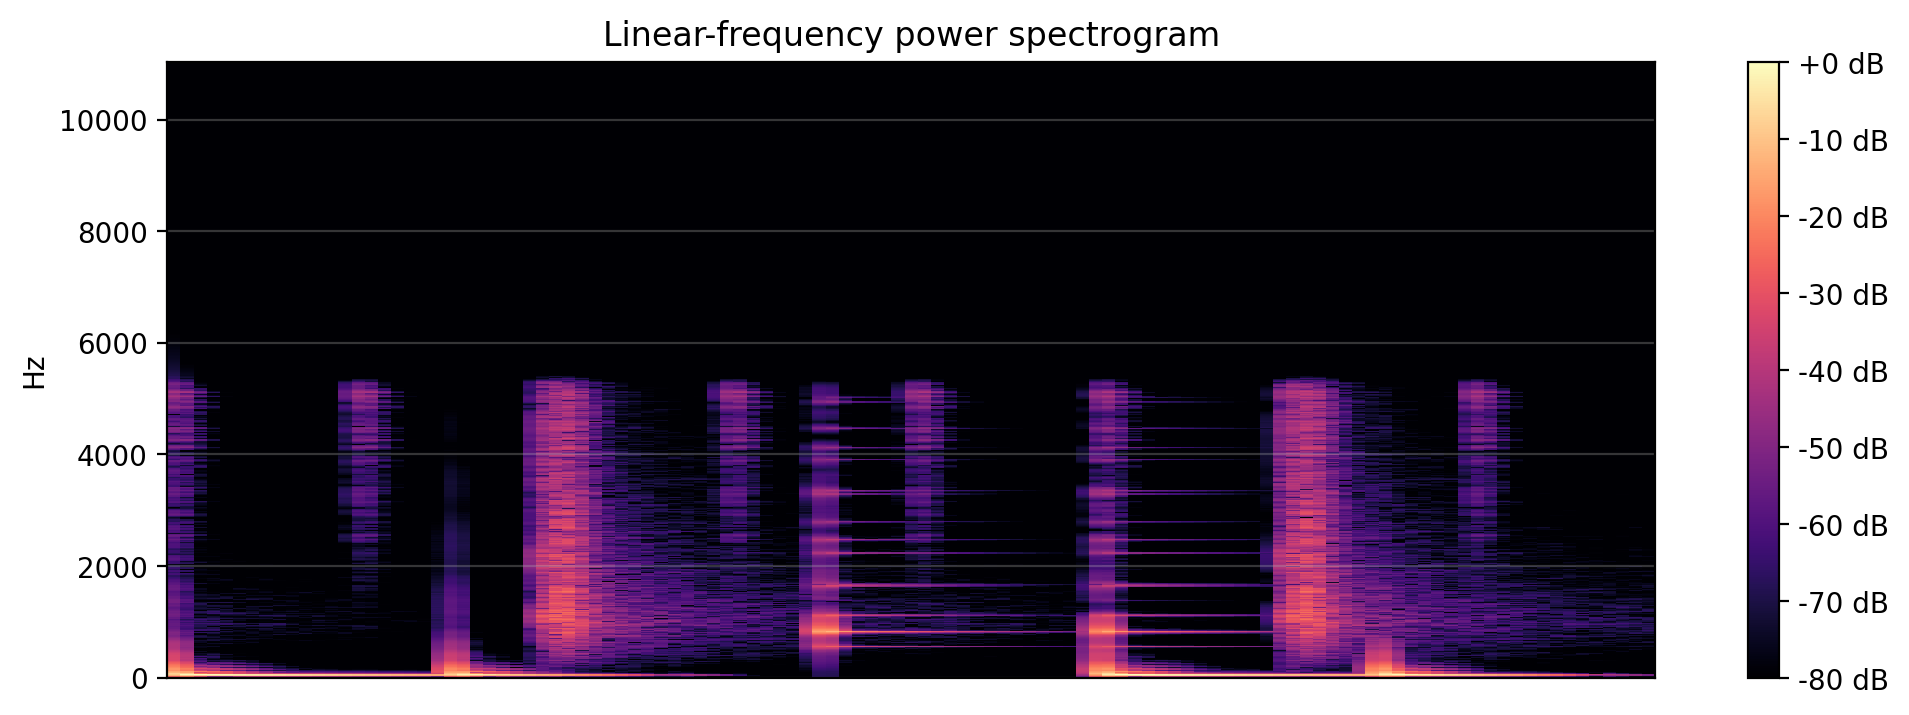

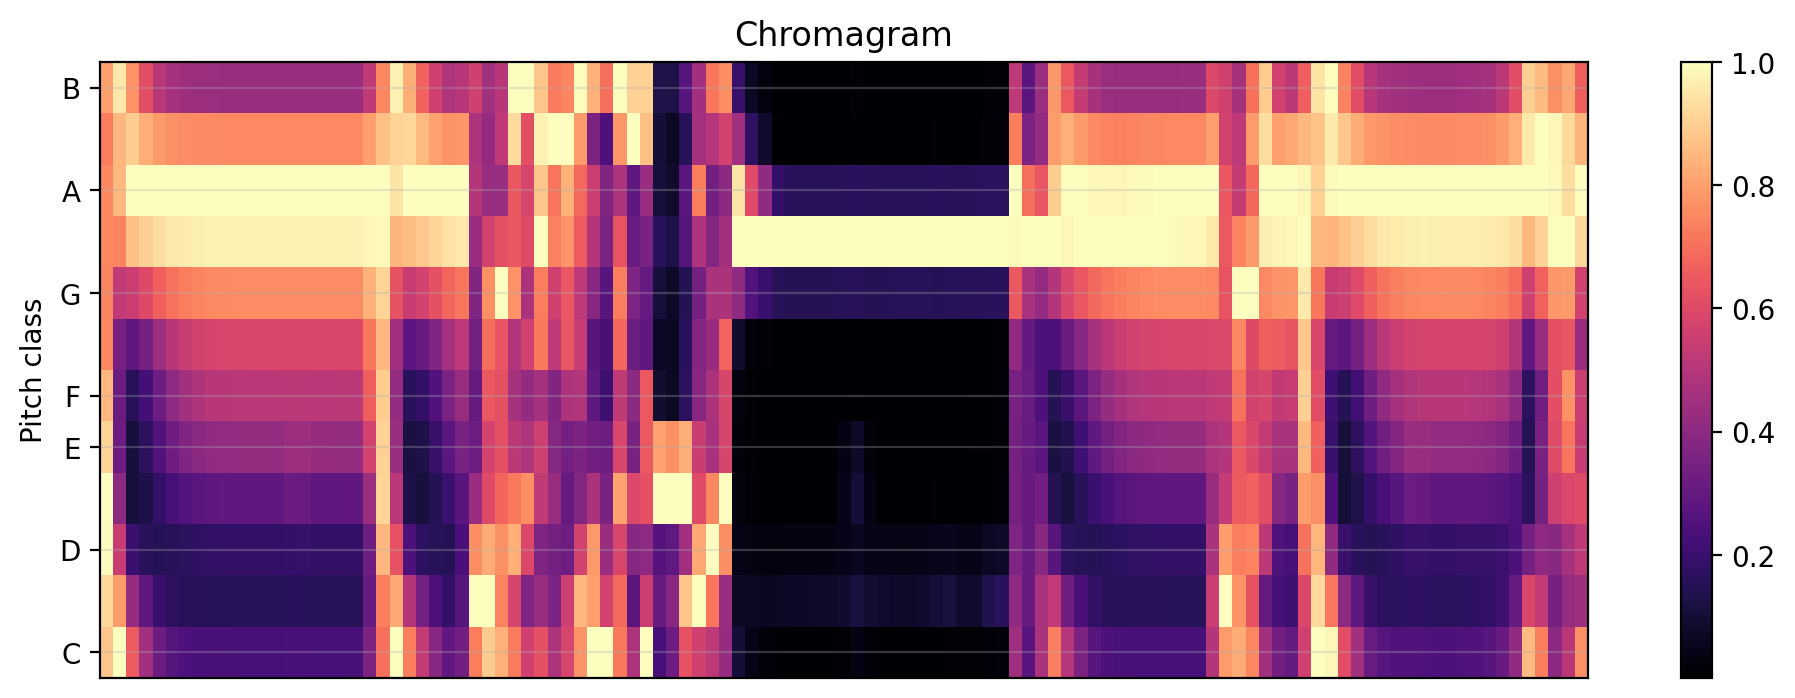

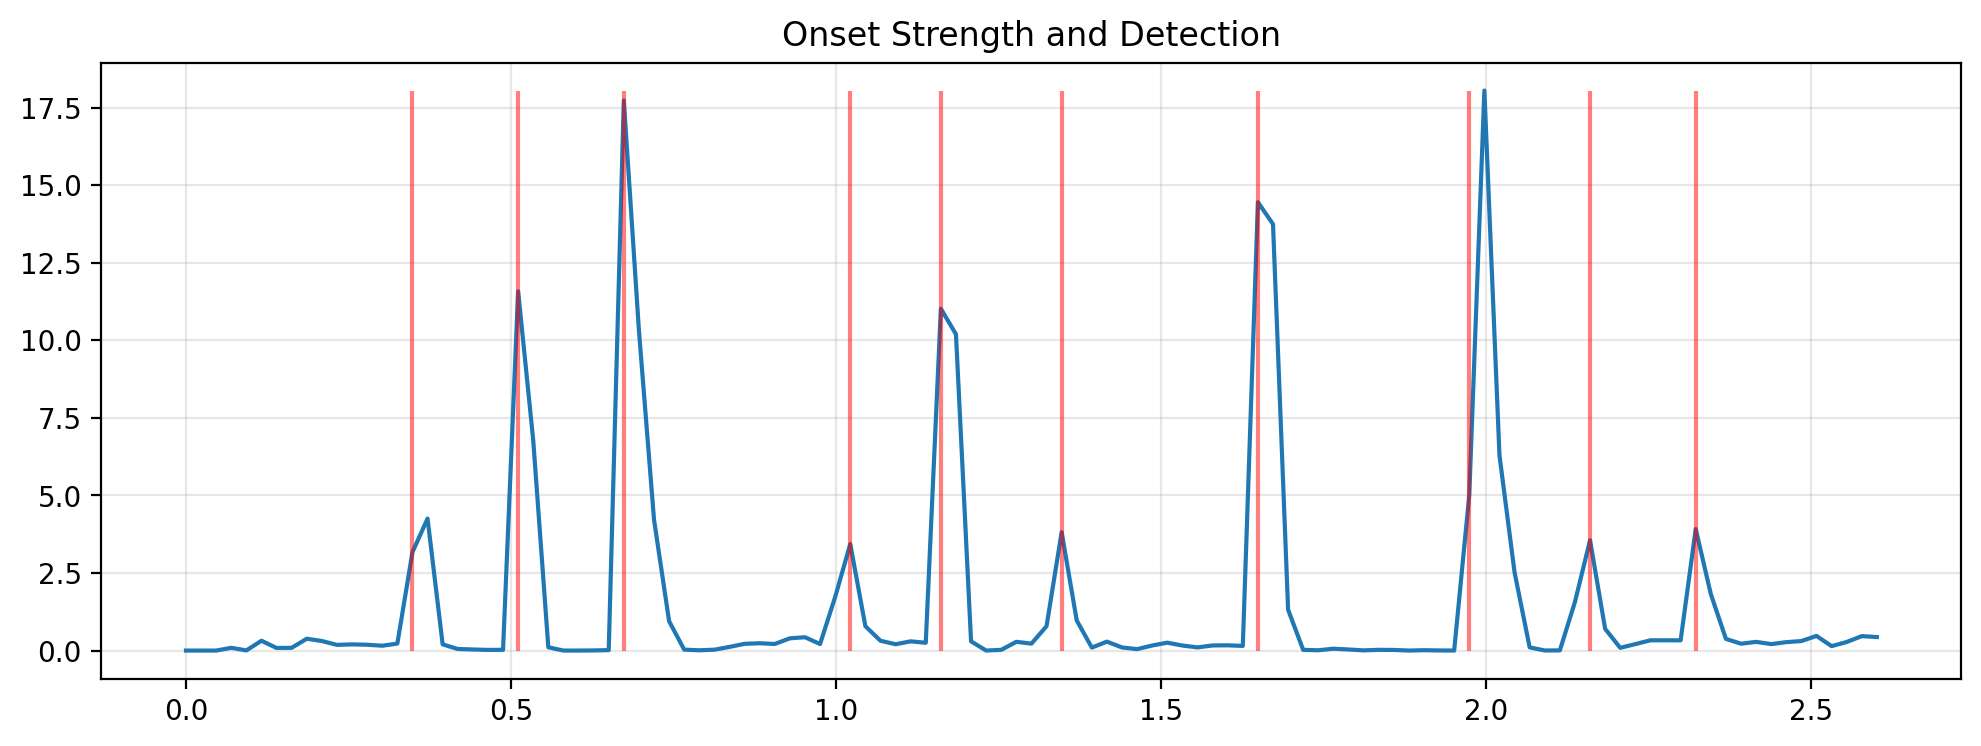

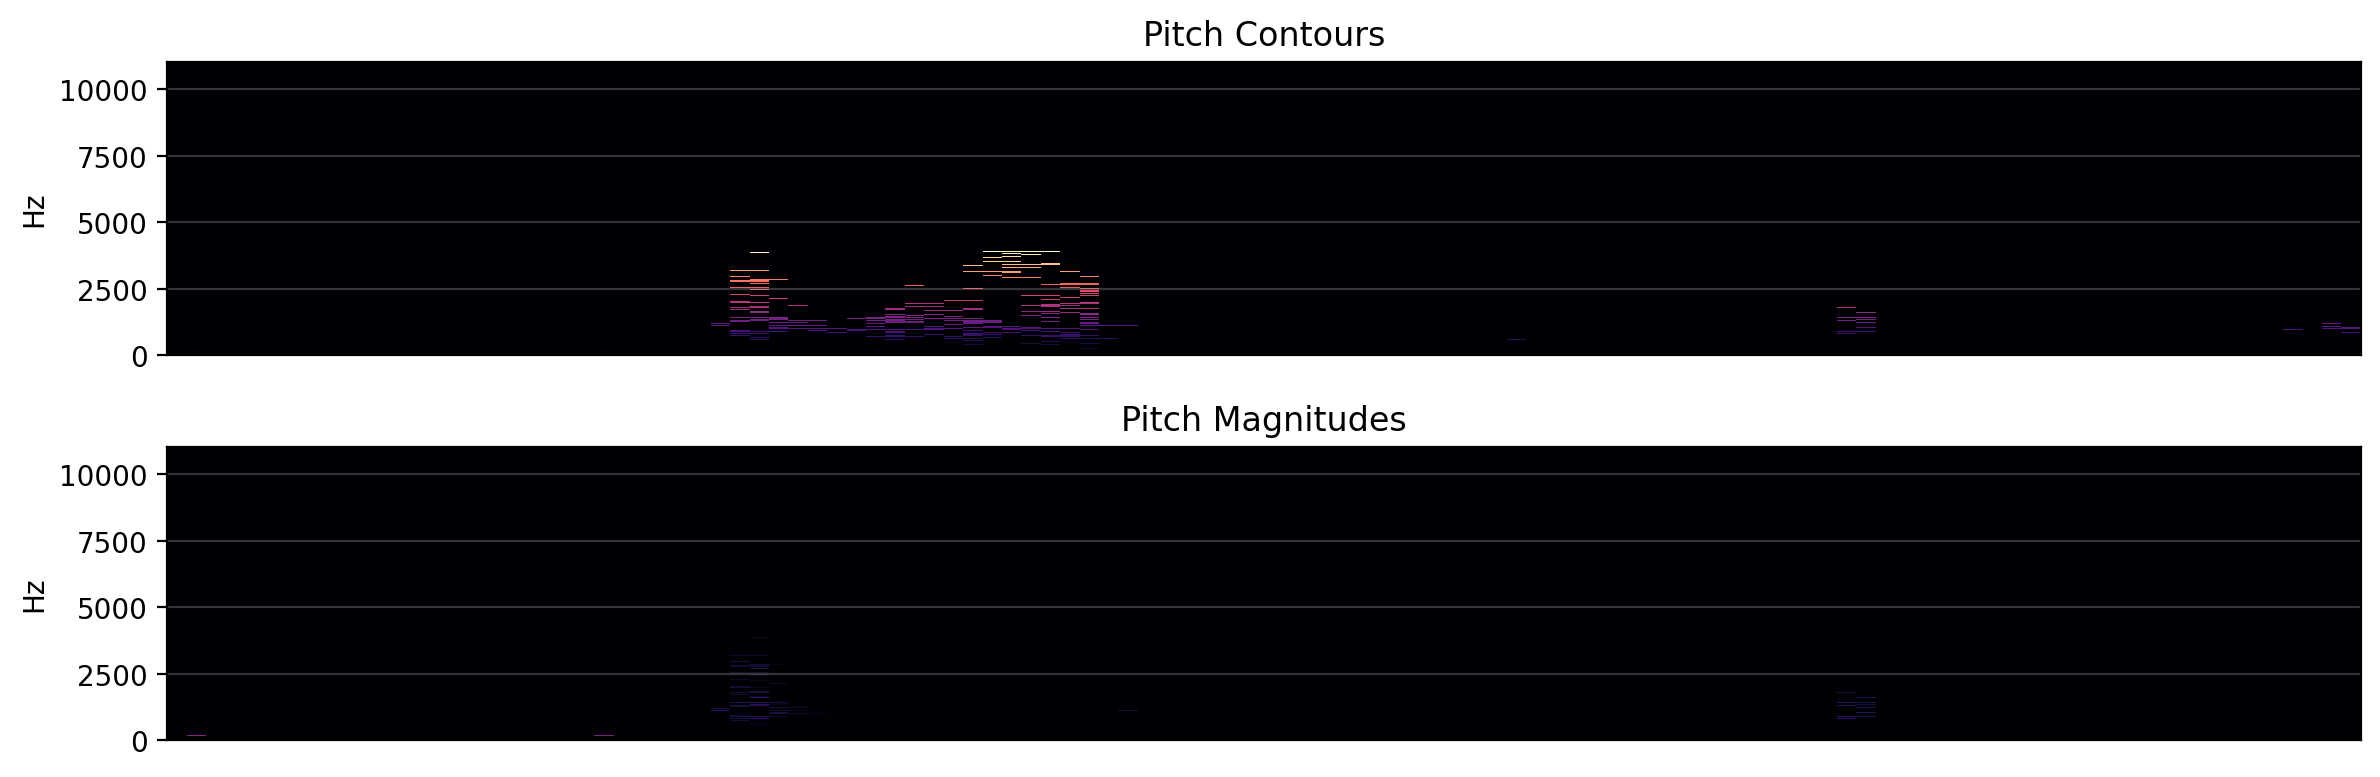

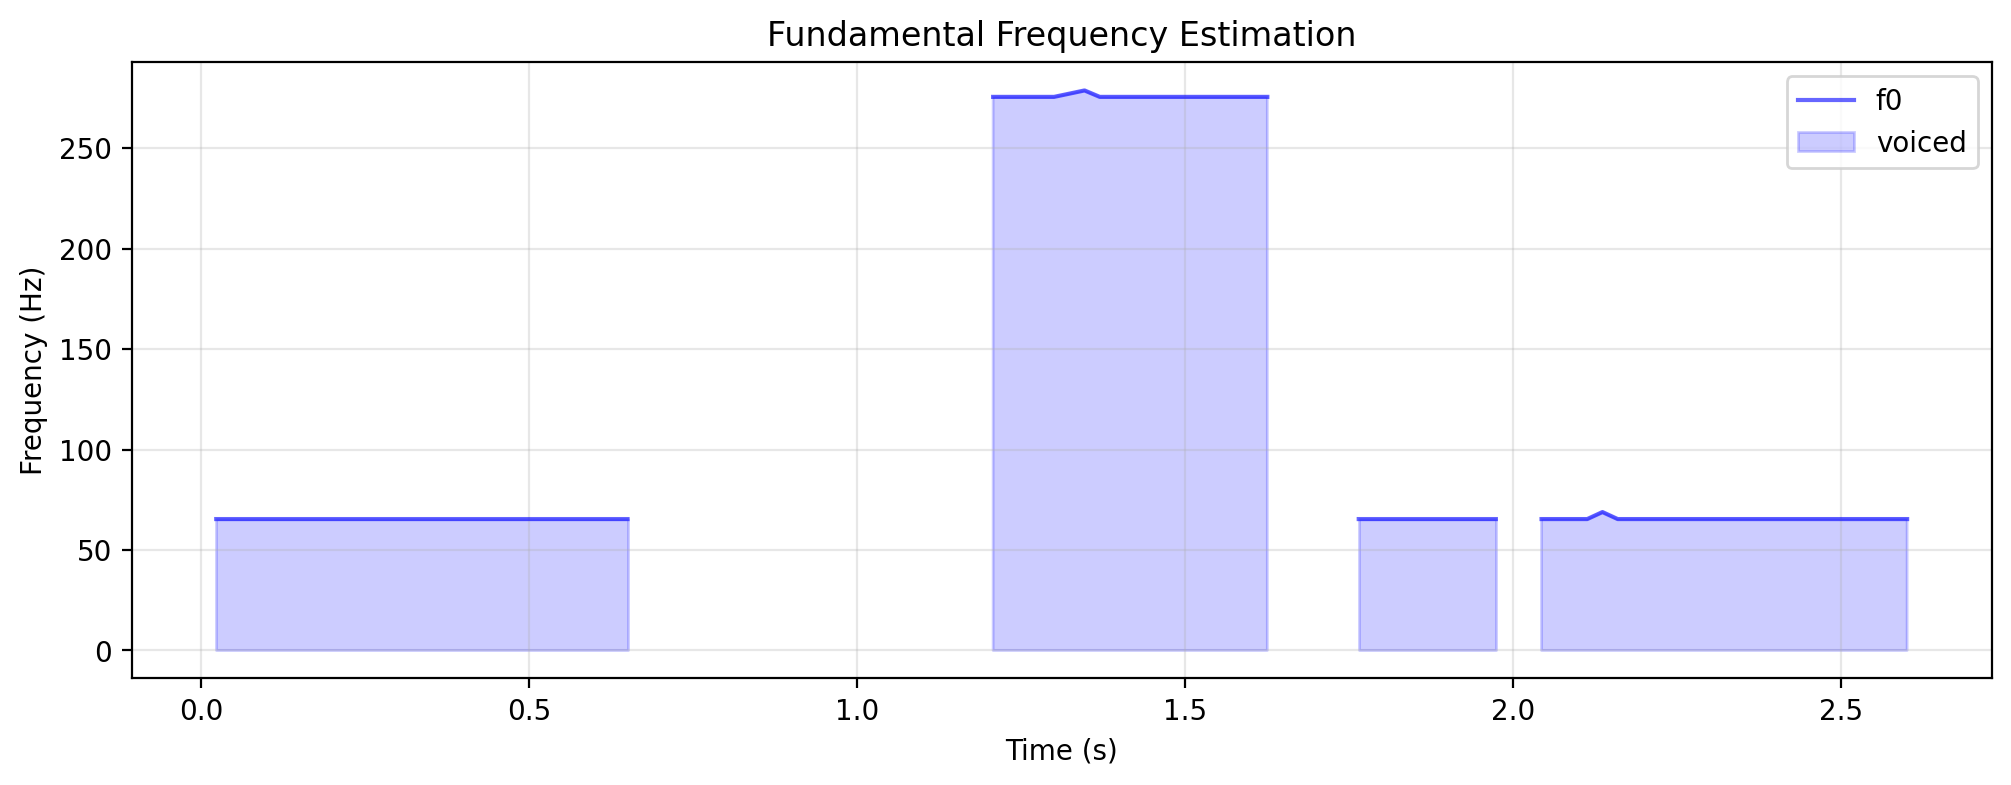

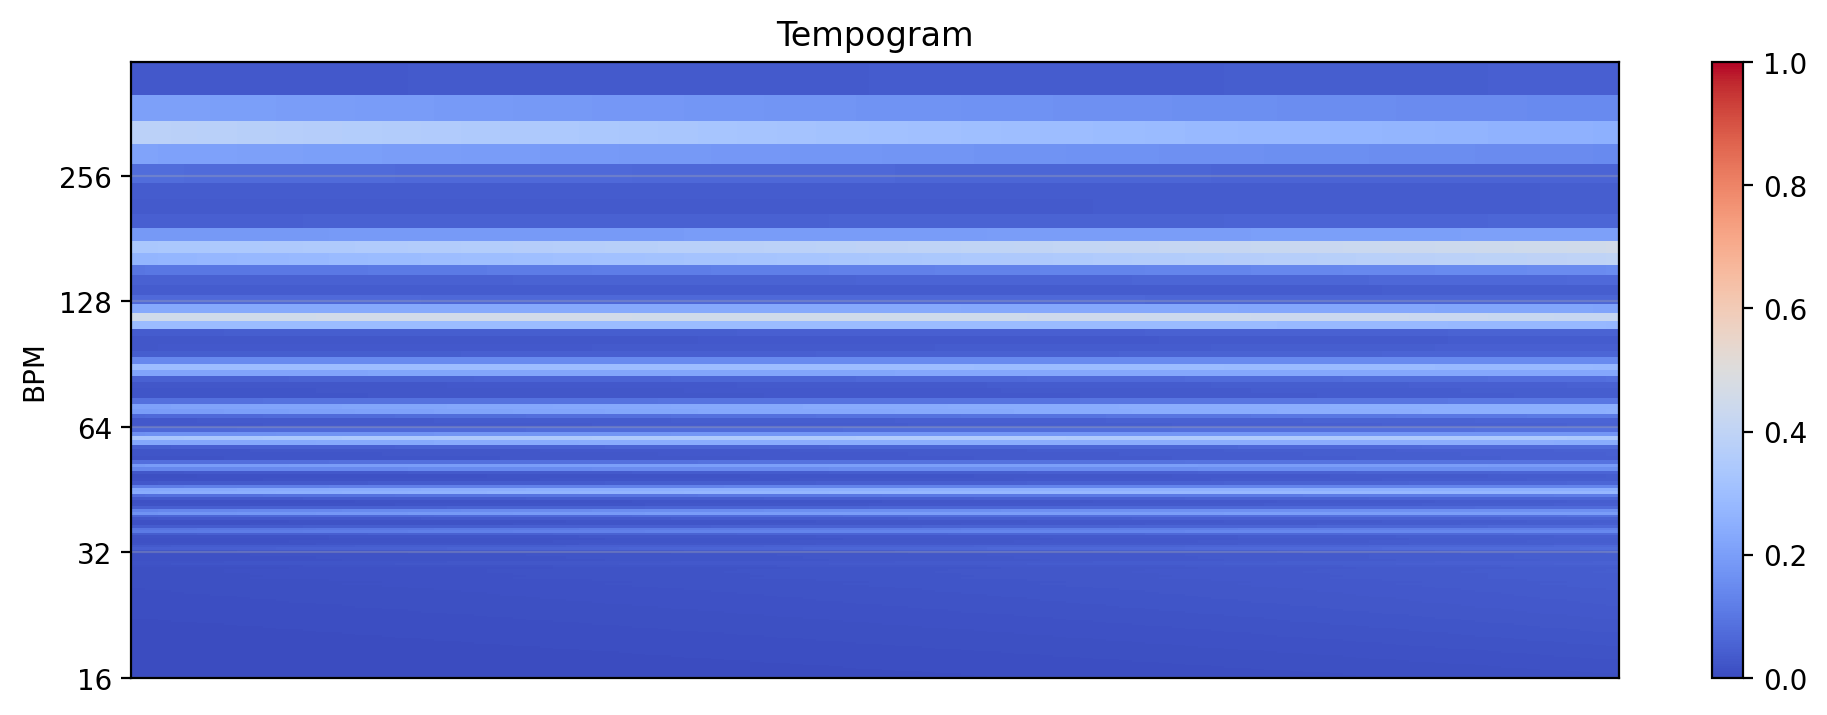

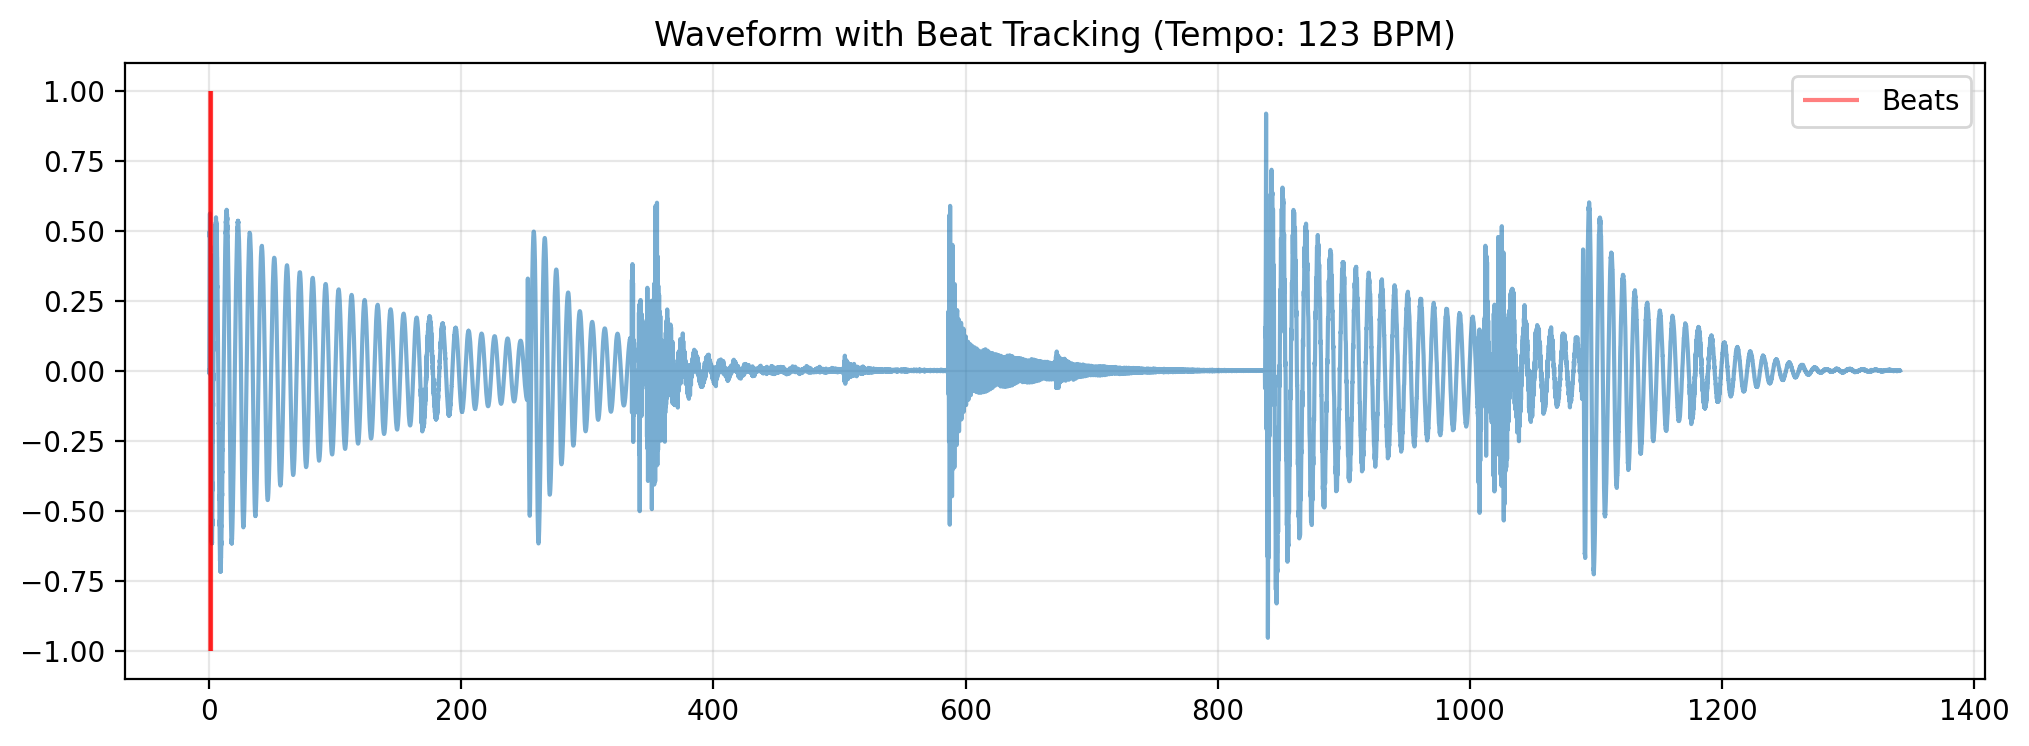

In [10]:
def basic_waveform_analysis(y, sr):
    """Display basic waveform and audio properties"""
    plt.figure()
    plt.plot(librosa.times_like(y), y)
    plt.title('Waveform with Time Axis')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    # Display audio properties
    duration = librosa.get_duration(y=y, sr=sr)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)[0]

    print(f"Duration: {duration:.2f} seconds")
    print(f"Estimated tempo: {tempo[0]:.0f} BPM")
    print(f"Average RMS energy: {np.mean(rms):.3f}")

def spectral_analysis(y, sr):
    """Perform various spectral analyses"""
    # Compute and display spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.figure()
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Linear-frequency power spectrogram')
    plt.show()

    # Compute and display chromagram
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    plt.figure()
    librosa.display.specshow(chroma, y_axis='chroma')
    plt.colorbar()
    plt.title('Chromagram')
    plt.show()

    # Display onset detection
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    onset_frames = librosa.onset.onset_detect(onset_envelope=onset_env)
    onset_times = librosa.frames_to_time(onset_frames)

    plt.figure()
    plt.plot(librosa.times_like(onset_env), onset_env)
    plt.vlines(onset_times, 0, onset_env.max(), color='r', alpha=0.5)
    plt.title('Onset Strength and Detection')
    plt.show()

def pitch_and_melody(y, sr):
    """Analyze pitch and melodic content"""
    # Extract pitch using CREPE-like approach
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)

    plt.figure()
    plt.subplot(2, 1, 1)
    librosa.display.specshow(pitches, y_axis='linear')
    plt.title('Pitch Contours')

    plt.subplot(2, 1, 2)
    librosa.display.specshow(magnitudes, y_axis='linear')
    plt.title('Pitch Magnitudes')
    plt.tight_layout()
    plt.show()

    # Fundamental frequency (f0) estimation
    f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
    times = librosa.times_like(f0)

    plt.figure()
    plt.plot(times, f0, label='f0', color='blue', alpha=0.6)
    plt.fill_between(times, f0, where=voiced_flag, color='blue', alpha=0.2, label='voiced')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Fundamental Frequency Estimation')
    plt.legend()
    plt.show()

def rhythm_analysis(y, sr):
    """Analyze rhythmic content"""
    # Compute tempogram
    tempogram = librosa.feature.tempogram(y=y, sr=sr)

    plt.figure()
    librosa.display.specshow(tempogram, y_axis='tempo')
    plt.colorbar()
    plt.title('Tempogram')
    plt.show()

    # Beat tracking
    tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
    beat_times = librosa.frames_to_time(beat_frames)

    plt.figure()
    plt.plot(librosa.times_like(y), y, alpha=0.6)
    plt.vlines(beat_times, -1, 1, color='r', alpha=0.5, label='Beats')
    plt.legend()
    plt.title(f'Waveform with Beat Tracking (Tempo: {tempo[0]:.0f} BPM)')
    plt.show()

# Run each analysis function
basic_waveform_analysis(y, sr)
spectral_analysis(y, sr)
pitch_and_melody(y, sr)
rhythm_analysis(y, sr)

# 3. Sound Synthesis using Music21 

In [11]:
def music21_example():
    # Create a simple melody
    melody = music21.converter.parse('tinynotation: 4/4 c4 d8 e f4 g a b c')
    
    melody.show('text')
    
    key = melody.analyze('key')
    print(f"Detected key: {key}")

    sp = music21.midi.realtime.StreamPlayer(melody)

    sp.play()



In [12]:
music21_example()

{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.note.Note C>
    {1.0} <music21.note.Note D>
    {1.5} <music21.note.Note E>
    {2.0} <music21.note.Note F>
    {3.0} <music21.note.Note G>
{4.0} <music21.stream.Measure 2 offset=4.0>
    {0.0} <music21.note.Note A>
    {1.0} <music21.note.Note B>
    {2.0} <music21.note.Note C>
    {3.0} <music21.bar.Barline type=final>
Detected key: F major


In [23]:
def create_basic_score():
    """Create and analyze a basic score"""
    score = music21.stream.Score()
    piano = music21.instrument.Piano()
    melody = music21.stream.Part()
    melody.append(piano)
    
    notes = ['C4', 'E4', 'G4', 'C5', 'G4', 'E4', 'C4', 'G4', 'C5']
    durations = [1.0, 0.5, 0.5, 2.0, 1.0, 0.5, 0.5, 1.0, 2.0]
    
    for note_name, duration in zip(notes, durations):
        n = music21.note.Note(note_name, quarterLength=duration)
        melody.append(n)
    
    score.append(melody)
    
    # Analyze and print information
    print("\nScore Analysis:")
    print(f"Key: {melody.analyze('key')}")
    print(f"Number of notes: {len(melody.notes)}")
    
    return score

def chord_progression_analysis():
    """Create and analyze chord progressions"""
    chords = ['C', 'Am', 'F', 'G', 'Cmaj7', 'Dm7', 'G7', 'Em7b5', 'Caug', 'Fdim7']
    progression = music21.stream.Part()
    
    for chord_name in chords:
        c = music21.harmony.ChordSymbol(chord_name)
        c.quarterLength = 4.0
        progression.append(c)
    
    print("\nChord Progression Analysis:")
    for chord in progression.getElementsByClass('ChordSymbol'):
        print(f"\nChord: {chord.figure}")
        print(f"Root: {chord.root().name}")
        print(f"Bass: {chord.bass().name}")
        print(f"Common name: {chord.commonName}")
        print(f"Pitch classes: {[p.name for p in chord.pitches]}")
        
        if chord.isTriad():
            print(f"Triad type: {chord.quality}")
        
        if chord.isSeventh():
            print("This is a seventh chord")
        
        print(f"Inversion: {chord.inversion()}")
        print(f"Normal order: {chord.normalOrder}")
        print(f"Prime form: {chord.primeForm}")

    # Play the chord progression
    sp = music21.midi.realtime.StreamPlayer(progression)
    sp.play()

def chord_progression_voice_leading():
    """Analyze voice leading in chord progressions"""
    progression = [
        music21.harmony.ChordSymbol('C'),
        music21.harmony.ChordSymbol('G'),
        music21.harmony.ChordSymbol('Am'),
        music21.harmony.ChordSymbol('F')
    ]
    
    print("\nVoice Leading Analysis:")
    for i in range(len(progression) - 1):
        chord1 = progression[i]
        chord2 = progression[i + 1]
        
        print(f"\nMovement from {chord1.figure} to {chord2.figure}:")
        
        for p1, p2 in zip(chord1.pitches, chord2.pitches):
            interval = music21.interval.Interval(p1, p2)
            print(f"Voice moves from {p1.name} to {p2.name} by {interval.directedNiceName}")

def scale_and_mode_examples():
    """Demonstrate scales and modes"""
    scales = {
        'Major': music21.scale.MajorScale('C'),
        'Natural Minor': music21.scale.MinorScale('C'),
        'Harmonic Minor': music21.scale.HarmonicMinorScale('C'),
        'Melodic Minor': music21.scale.MelodicMinorScale('C'),
        'Dorian': music21.scale.DorianScale('C'),
        'Mixolydian': music21.scale.MixolydianScale('C')
    }
    
    print("\nScale Analysis:")
    for name, scale in scales.items():
        print(f"\n{name} Scale:")
        pitches = [str(p) for p in scale.getPitches()]
        print(f"Pitches: {pitches}")
        # play the scale
        scale_stream = music21.stream.Stream()
        for pitch in scale.getPitches():
            n = music21.note.Note(pitch)
            scale_stream.append(n)
        sp = music21.midi.realtime.StreamPlayer(scale_stream)
        sp.play()

def melodic_analysis():
    """Analyze melodic patterns and intervals"""
    melody = music21.converter.parse('tinynotation: 4/4 c4 d8 e f4 g a b c')
    
    print("\nMelodic Analysis:")
    intervals = []
    for i in range(len(melody.notes) - 1):
        interval = music21.interval.Interval(melody.notes[i], melody.notes[i + 1])
        intervals.append(interval)
    
    print("\nInterval Analysis:")
    for i, interval in enumerate(intervals):
        print(f"Interval {i+1}: {interval.directedNiceName}")


Score Analysis:
Key: C major
Number of notes: 9


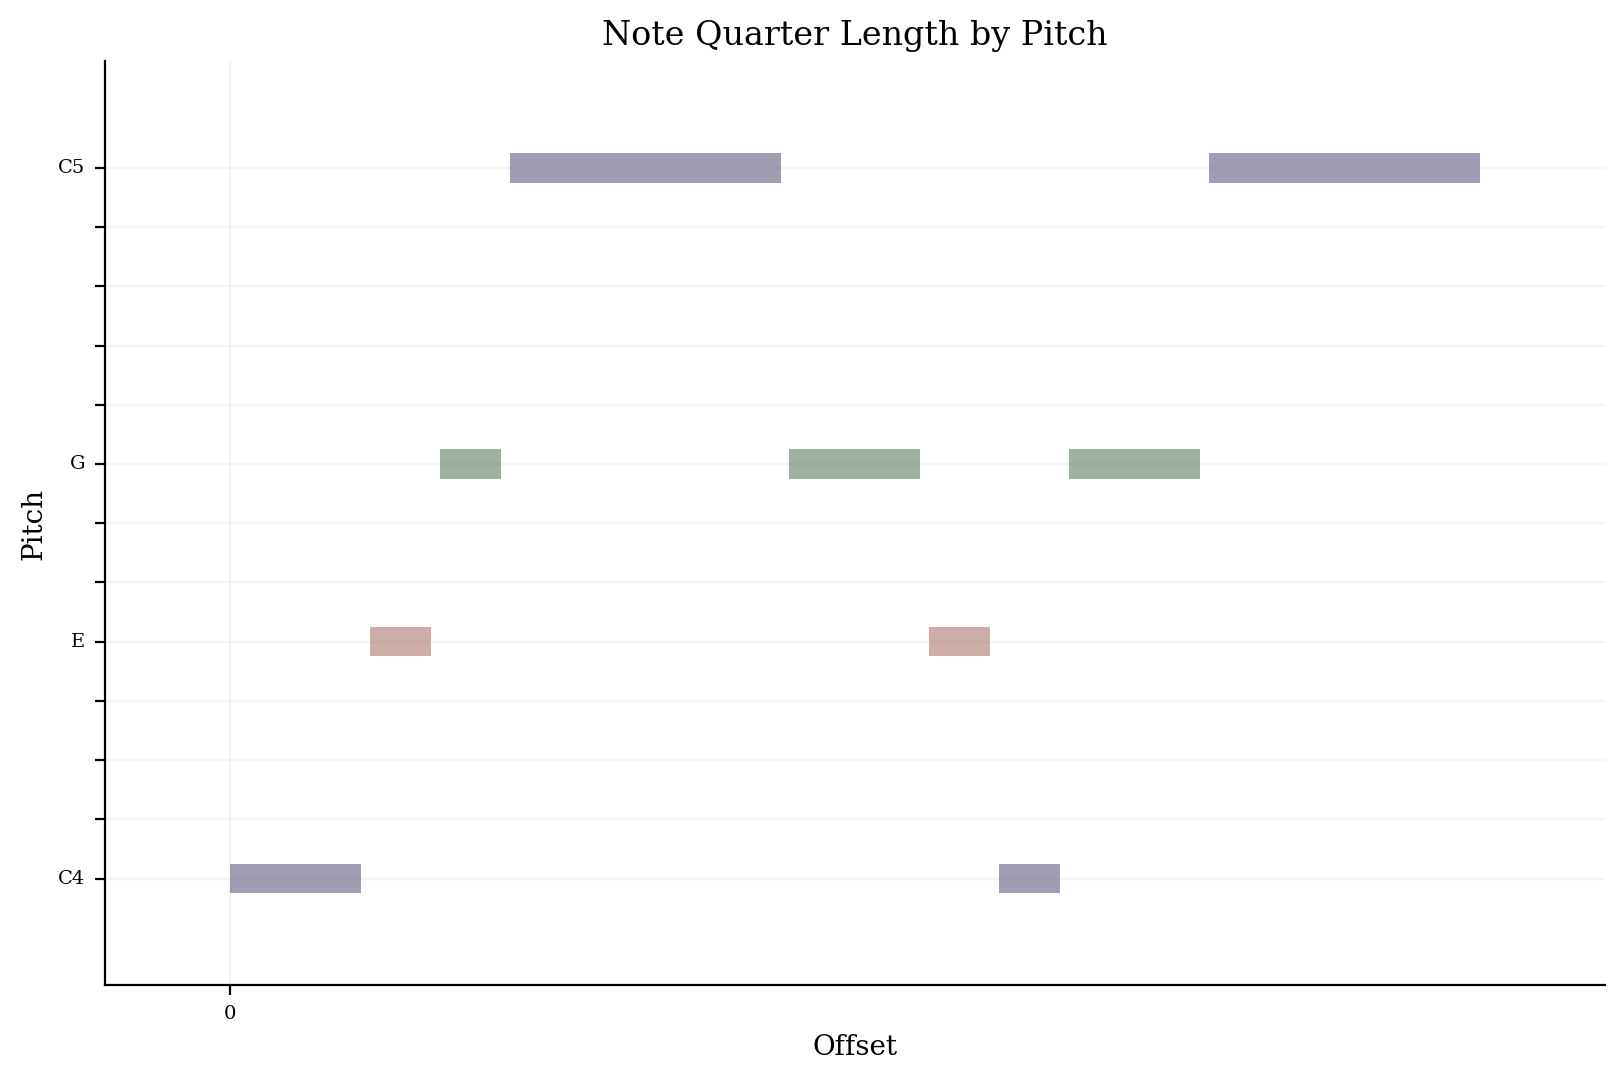

In [24]:
score = create_basic_score()
score.plot('pianoroll')

In [25]:
chord_progression_analysis()


Chord Progression Analysis:

Chord: C
Root: C
Bass: C
Common name: major triad
Pitch classes: ['C', 'E', 'G']
Triad type: major
Inversion: 0
Normal order: [0, 4, 7]
Prime form: [0, 3, 7]

Chord: Am
Root: A
Bass: A
Common name: minor triad
Pitch classes: ['A', 'C', 'E']
Triad type: minor
Inversion: 0
Normal order: [9, 0, 4]
Prime form: [0, 3, 7]

Chord: F
Root: F
Bass: F
Common name: major triad
Pitch classes: ['F', 'A', 'C']
Triad type: major
Inversion: 0
Normal order: [5, 9, 0]
Prime form: [0, 3, 7]

Chord: G
Root: G
Bass: G
Common name: major triad
Pitch classes: ['G', 'B', 'D']
Triad type: major
Inversion: 0
Normal order: [7, 11, 2]
Prime form: [0, 3, 7]

Chord: Cmaj7
Root: C
Bass: C
Common name: major seventh chord
Pitch classes: ['C', 'E', 'G', 'B']
This is a seventh chord
Inversion: 0
Normal order: [11, 0, 4, 7]
Prime form: [0, 1, 5, 8]

Chord: Dm7
Root: D
Bass: D
Common name: minor seventh chord
Pitch classes: ['D', 'F', 'A', 'C']
This is a seventh chord
Inversion: 0
Normal ord

In [26]:
chord_progression_voice_leading()


Voice Leading Analysis:

Movement from C to G:
Voice moves from C to G by Ascending Perfect Fifth
Voice moves from E to B by Ascending Perfect Fifth
Voice moves from G to D by Ascending Perfect Fifth

Movement from G to Am:
Voice moves from G to A by Descending Minor Seventh
Voice moves from B to C by Descending Major Seventh
Voice moves from D to E by Descending Minor Seventh

Movement from Am to F:
Voice moves from A to F by Ascending Minor Sixth
Voice moves from C to A by Ascending Major Sixth
Voice moves from E to C by Ascending Minor Sixth


In [27]:
scale_and_mode_examples()


Scale Analysis:

Major Scale:
Pitches: ['C4', 'D4', 'E4', 'F4', 'G4', 'A4', 'B4', 'C5']

Natural Minor Scale:
Pitches: ['C4', 'D4', 'E-4', 'F4', 'G4', 'A-4', 'B-4', 'C5']

Harmonic Minor Scale:
Pitches: ['C4', 'D4', 'E-4', 'F4', 'G4', 'A-4', 'B4', 'C5']

Melodic Minor Scale:
Pitches: ['C4', 'D4', 'E-4', 'F4', 'G4', 'A4', 'B4', 'C5']

Dorian Scale:
Pitches: ['C4', 'D4', 'E-4', 'F4', 'G4', 'A4', 'B-4', 'C5']

Mixolydian Scale:
Pitches: ['C4', 'D4', 'E4', 'F4', 'G4', 'A4', 'B-4', 'C5']


In [28]:
#melodic_analysis()


Melodic Analysis:

Interval Analysis:


## Real-time Audio Processing

In [2]:
def sounddevice_example():
    """Record audio for 3 seconds"""
    duration = 3  # seconds
    fs = 44100  # sample rate
    print("Recording...")
    recording = sd.rec(int(duration * fs), samplerate=fs, channels=1)
    sd.wait()
    print("Recording finished")
    return recording

In [3]:
recording = sounddevice_example()

Recording...
Recording finished


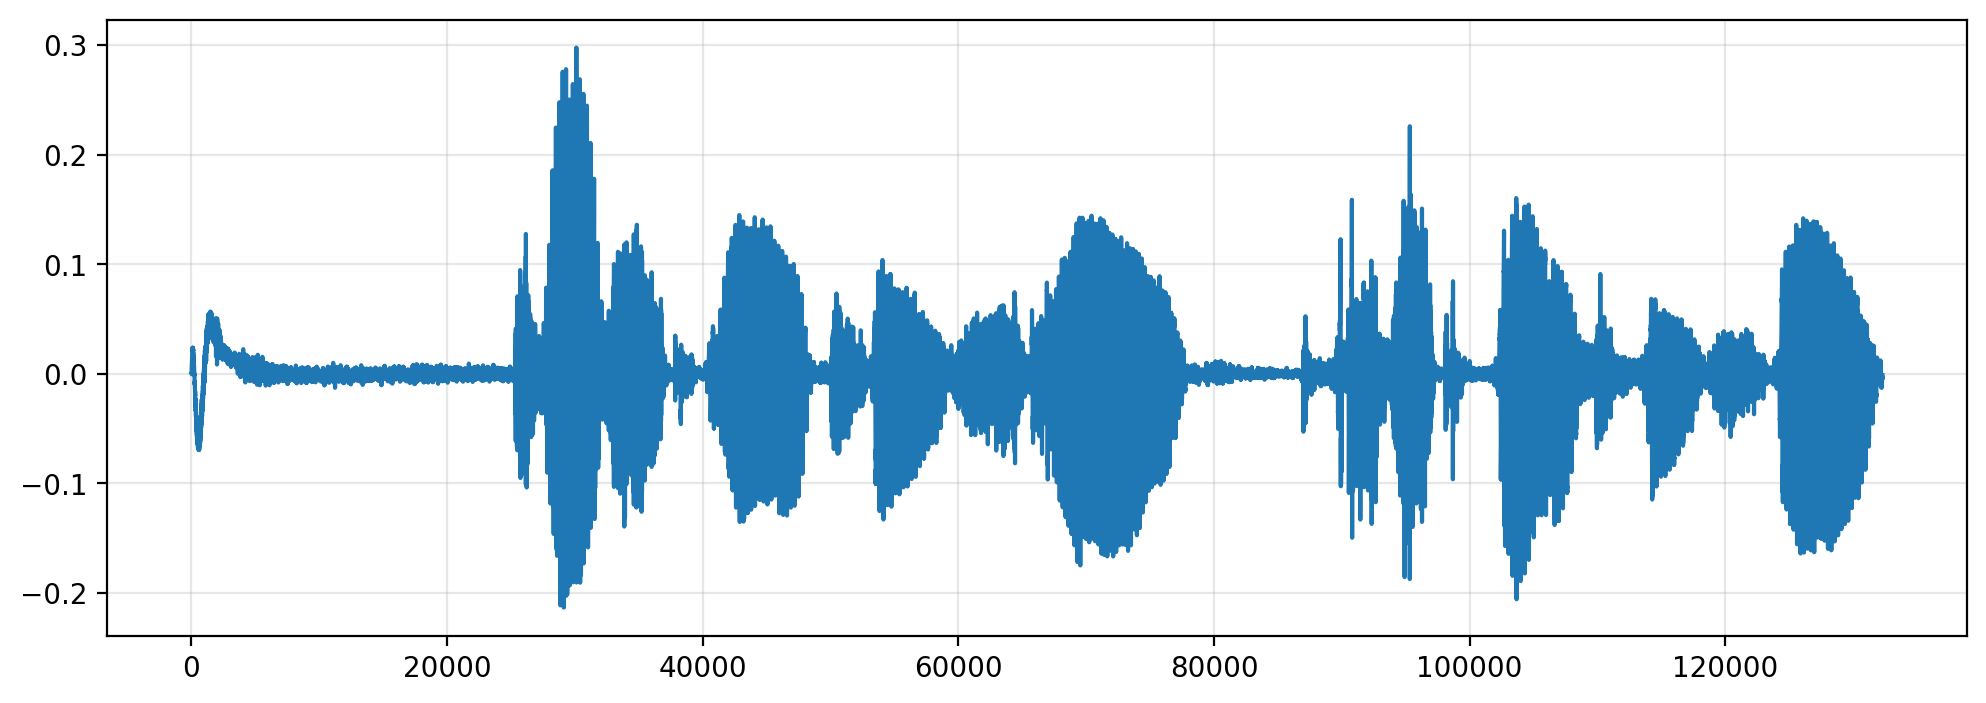

In [4]:
plt.plot(recording)
sf.write("recorded_audio.wav", data=recording, samplerate=44100)
Audio("recorded_audio.wav")

# 4. Spotify Pedalboard 

In [21]:
pedalboard.version

<module 'pedalboard.version' from '/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pedalboard/version.py'>

In [23]:
from pedalboard import Pedalboard, Chorus, Reverb
from pedalboard.io import AudioFile

# Make a Pedalboard object, containing multiple audio plugins:
board = Pedalboard([Chorus(), Reverb(room_size=0.25)])

# Open an audio file for reading, just like a regular file:
with AudioFile('exported_sound.wav') as f:

  # Open an audio file to write to:
  with AudioFile('spotify_out.wav', 'w', f.samplerate, f.num_channels) as o:

    # Read one second of audio at a time, until the file is empty:
    while f.tell() < f.frames:
      chunk = f.read(f.samplerate)

      # Run the audio through our pedalboard:
      effected = board(chunk, f.samplerate, reset=False)

      # Write the output to our output file:
      o.write(effected)

For more details, check out the [Pedalboard documentation](https://spotify.github.io/pedalboard/index.html), including their tools for Audio I/O, live audio streams, and use with VSTs!

This is a quick snippet because Pedalboard's quite a beast :\)